In [7]:
import pandas as pd
df = pd.read_csv('housing.csv')
print("First 5 rows of the DataFrame:")
print(df.head())
print("\nConcise summary of the DataFrame:")
df.info()

First 5 rows of the DataFrame:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income     price ocean_proximity society  
0       322.0       126.0         8.3252  452600.0        NEAR BAY   Urban  
1      2401.0      1138.0         8.3014  358500.0        NEAR BAY   Rural  
2       496.0       177.0         7.2574  352100.0        NEAR BAY     NaN  
3       558.0       219.0         5.6431  341300.0        NEAR BAY   Urban  
4       565.0       259.0         3.8462  342200.0        NEAR BAY   Rural  

Concise summary of the DataFrame:
<class 'pandas.core.f

In [2]:
import pandas as pd
dummy_data = {
    'longitude': [-122.23, -122.22, -122.24, -122.25, -122.25, -122.00],
    'latitude': [37.88, 37.86, 37.85, 37.85, 37.85, 37.00],
    'housing_median_age': [41.0, 21.0, 52.0, 52.0, 52.0, 30.0],
    'total_rooms': [880.0, 7099.0, 1467.0, 1274.0, 1627.0, 2000.0],
    'total_bedrooms': [129.0, 1106.0, 190.0, 235.0, 280.0, 400.0],
    'population': [322.0, 2401.0, 496.0, 558.0, 565.0, 1000.0],
    'households': [126.0, 1138.0, 177.0, 219.0, 259.0, 350.0],
    'median_income': [8.3252, 8.3014, 7.2574, 5.6431, 3.8462, 4.5000],
    'price': [452600.0, 358500.0, 352100.0, 341300.0, 342200.0, 1500000.0], # Added an outlier for 'price'
    'ocean_proximity': ['NEAR BAY', 'NEAR BAY', 'NEAR BAY', 'NEAR BAY', 'NEAR BAY', 'INLAND'],
    'society': ['Urban', 'Rural', None, 'Urban', 'Rural', None] # Added missing values for 'society'
}
dummy_df = pd.DataFrame(dummy_data)
dummy_df.to_csv('housing.csv', index=False)


df = pd.read_csv('housing.csv')

print("First 5 rows of the DataFrame:")
print(df.head())

print("\nConcise summary of the DataFrame:")
df.info()

First 5 rows of the DataFrame:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income     price ocean_proximity society  
0       322.0       126.0         8.3252  452600.0        NEAR BAY   Urban  
1      2401.0      1138.0         8.3014  358500.0        NEAR BAY   Rural  
2       496.0       177.0         7.2574  352100.0        NEAR BAY     NaN  
3       558.0       219.0         5.6431  341300.0        NEAR BAY   Urban  
4       565.0       259.0         3.8462  342200.0        NEAR BAY   Rural  

Concise summary of the DataFrame:
<class 'pandas.core.f

In [3]:
print("Missing values in 'society' column:")
print(df['society'].isnull().sum())
print("\nData type of 'society' column:")
print(df['society'].dtype)
print("\nValue counts of 'society' column (including NaN):")
print(df['society'].value_counts(dropna=False))

Missing values in 'society' column:
2

Data type of 'society' column:
object

Value counts of 'society' column (including NaN):
society
Urban    2
Rural    2
NaN      2
Name: count, dtype: int64


In [4]:
mode_society = df['society'].mode()[0]
print(f"Imputing missing values in 'society' column with the mode: '{mode_society}'")
df['society'].fillna(mode_society, inplace=True)
print("\nMissing values in 'society' column after imputation:")
print(df['society'].isnull().sum())
print("\nValue counts of 'society' column after imputation:")
print(df['society'].value_counts())


Imputing missing values in 'society' column with the mode: 'Rural'

Missing values in 'society' column after imputation:
0

Value counts of 'society' column after imputation:
society
Rural    4
Urban    2
Name: count, dtype: int64


/tmp/ipython-input-562669361.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['society'].fillna(mode_society, inplace=True)


In [5]:
mode_society = df['society'].mode()[0]
print(f"Imputing missing values in 'society' column with the mode: '{mode_society}'")
df['society'] = df['society'].fillna(mode_society)
print("\nMissing values in 'society' column after imputation:")
print(df['society'].isnull().sum())
print("\nValue counts of 'society' column after imputation:")
print(df['society'].value_counts())


Imputing missing values in 'society' column with the mode: 'Rural'

Missing values in 'society' column after imputation:
0

Value counts of 'society' column after imputation:
society
Rural    4
Urban    2
Name: count, dtype: int64


In [6]:
print("Descriptive statistics for 'price' column:")
print(df['price'].describe())

# Calculate Q1, Q3, and IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Determine outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\nQ1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Lower bound for outliers: {lower_bound}")
print(f"Upper bound for outliers: {upper_bound}")

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

print("\nIdentified outliers in 'price' column:")
if not outliers.empty:
    print(outliers[['price']])
else:
    print("No outliers found based on the IQR method.")

Descriptive statistics for 'price' column:
count    6.000000e+00
mean     5.577833e+05
std      4.635076e+05
min      3.413000e+05
25%      3.446750e+05
50%      3.553000e+05
75%      4.290750e+05
max      1.500000e+06
Name: price, dtype: float64

Q1: 344675.0
Q3: 429075.0
IQR: 84400.0
Lower bound for outliers: 218075.0
Upper bound for outliers: 555675.0

Identified outliers in 'price' column:
       price
5  1500000.0


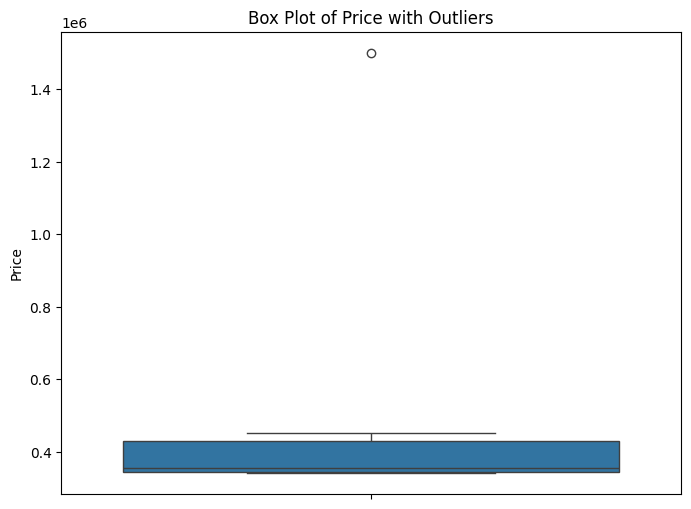

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['price'])
plt.title('Box Plot of Price with Outliers')
plt.ylabel('Price')
plt.show()

In [9]:
df_cleaned = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

print(f"Total row count of the cleaned dataset: {df_cleaned.shape[0]}")

print("\nFirst 5 rows of the cleaned DataFrame:")
print(df_cleaned.head())

Total row count of the cleaned dataset: 5

First 5 rows of the cleaned DataFrame:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income     price ocean_proximity society  
0       322.0       126.0         8.3252  452600.0        NEAR BAY   Urban  
1      2401.0      1138.0         8.3014  358500.0        NEAR BAY   Rural  
2       496.0       177.0         7.2574  352100.0        NEAR BAY     NaN  
3       558.0       219.0         5.6431  341300.0        NEAR BAY   Urban  
4       565.0       259.0         3.8462  342200.0        NEAR BAY   Rural  
